## Data Cleaning & Wrangling

In [662]:
#Import modules

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Great Britain Data

In [663]:
# Import csv files as pandas data frames
gb_comments=pd.read_csv('/Users/anna/Downloads/youtube/GBcomments.csv',error_bad_lines=False)
gb_comments.shape

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


(718452, 4)

In [664]:
gb_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [665]:
category_gb=pd.read_json('/Users/anna/Downloads/youtube-new/GB_category_id.json')
category_gb.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [666]:
category_gb['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [667]:
#extract data from the JSON file 

categories_gb={}
for row in category_gb['items']:
    cat_id=row['id']
    category=row['snippet']['title']
    categories_gb[cat_id]=category
categories_gb=pd.DataFrame.from_dict(categories_gb, orient='index').reset_index()
categories_gb.columns=['category_id','category']
categories_gb['category_id']=np.int64(categories_gb.category_id)
categories_gb.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [852]:
gb_videos=pd.read_csv('/Users/anna/Downloads/youtube-new/GBvideos.csv',error_bad_lines=False)
gb_videos.shape

(38916, 16)

In [669]:
df_gb=gb_videos.merge(categories_gb, how='left',on='category_id')
df_gb[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment


In [671]:
#count how many tags are included in the video


tags_gb={}
for row in df_gb.tags:
    count=len(row.split('|'))
    tags_gb[row]=count
tag_count_gb=pd.DataFrame.from_dict(tags_gb,orient='index').reset_index()
tag_count_gb.columns=['tags','tag_count']
tag_count_gb.head()

,tags,tag_count
0,"christmas|""john lewis christmas""|""john lewis""|...",9
1,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",36
2,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",6
3,"Salford City FC|""Salford City""|""Salford""|""Clas...",9
4,[none],1


In [672]:
#indicate that all of the data from this data frame is from Great Britain, so that we account for this when we merge 
#all our data

df_gb=df_gb.merge(tag_count_gb,how='left',on='tags')
df_gb['country']='GB'
df_gb[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,9,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,36,GB


In [673]:
#there are null values in the category column

df_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38916 entries, 0 to 38915
Data columns (total 19 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category                  38826 non-null object
tag_count                 38916 non-null int64
country                   38916 non-nul

Which categories have null values?

In [674]:
len(df_gb[df_gb.category.isnull()])/len(df_gb)

0.002312673450508788

Since this is just .23% of our data, we drop these videos

In [586]:
df_gb=df_gb.dropna()

### US Data

We do the same data wrangling that we did with the GB Data. First, using the file we extracted from the JSON file, we create a new column on our main US data frame (df_us) named 'category' which indicates the category the video belongs in. Next, we count how many tags each video has, and put it under the column 'tag_count'. Lastly, to account for the demographic of this data, we indicate that all these stats were from the US. 

In [436]:
us_comments=pd.read_csv('/Users/anna/Downloads/youtube/UScomments.csv',error_bad_lines=False)
us_comments.shape

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/anna/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(691400, 4)

In [437]:
us_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [438]:
category_us=pd.read_json('/Users/anna/Downloads/youtube-new/US_category_id.json')
category_us.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [439]:
categories_us={}
for row in category_us['items']:
    cat_id=row['id']
    category=row['snippet']['title']
    categories_us[cat_id]=category
categories_us=pd.DataFrame.from_dict(categories_us, orient='index').reset_index()
categories_us.columns=['category_id','category']
categories_us['category_id']=np.int64(categories_us.category_id)
categories_us.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [440]:
us_videos=pd.read_csv('/Users/anna/Downloads/youtube-new/USvideos.csv',error_bad_lines=False)
us_videos.shape

(40949, 16)

In [598]:
df_us=us_videos.merge(categories_us, how='left',on='category_id')
df_us[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [442]:
tags_us={}
for row in df_us.tags:
    count=len(row.split('|'))
    tags_us[row]=count
tag_count_us=pd.DataFrame.from_dict(tags_us,orient='index').reset_index()
tag_count_us.columns=['tags','tag_count']
tag_count_us.head()

,tags,tag_count
0,SHANtell martin,1
1,"last week tonight trump presidency|""last week ...",4
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",23
3,"rhett and link|""gmm""|""good mythical morning""|""...",27
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14


In [443]:
df_us=df_us.merge(tag_count_us,how='left',on='tags')
df_us['country']='US'
df_us[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,4,US


In [444]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category                  40949 non-null object
tag_count                 40949 non-null int64
country                   40949 non-nul

Now, we combine both data frames into one.

In [505]:
df=df_gb.append(df_us).set_index('video_id')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
video_id,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,9,GB
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,36,GB
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,6,GB
PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,9,GB
rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,1,GB


More data cleaning: 

In [506]:
#the dates under the 'trending_date' column are object types that have the following format: year/day/month
#to be able to convert this data to a datetime type, we need to change the format to year/month/day

dates=[]
for date in df.trending_date:
    month=date[6:8]
    day=date[3:5]
    year=date[:2]
    x='20'+str(year+month+day)
    dates.append(x)

In [508]:
df['trending_date']=pd.to_datetime(dates)

In [511]:
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'tag_count',
       'country'],
      dtype='object')

## Exploratory Data Analysis/Data Visualization

### Which categories have the most trending videos?

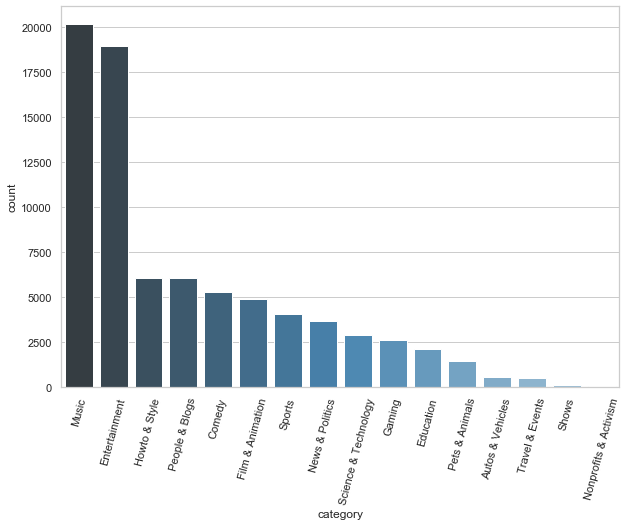

In [512]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=75)
ax=sns.countplot(x="category", data=df,palette=("Blues_d"),order=df['category'].value_counts().index)


### Which categories are more popular in each country?

We take the total number of videos in each category, and divide it by the total number of videos from each country. This is to address the fact that we have more videos in our US dataset.

In [513]:
gb_cat=df_gb.category.value_counts()/len(df_gb)
gb_cat=pd.DataFrame(gb_cat).reset_index()
gb_cat.columns=['category','gb_ratio']
us_cat=df_us.category.value_counts()/len(df_us)
us_cat=pd.DataFrame(us_cat).reset_index()
us_cat.columns=['category','us_ratio']
cat=gb_cat.merge(us_cat,how='left',on='category')

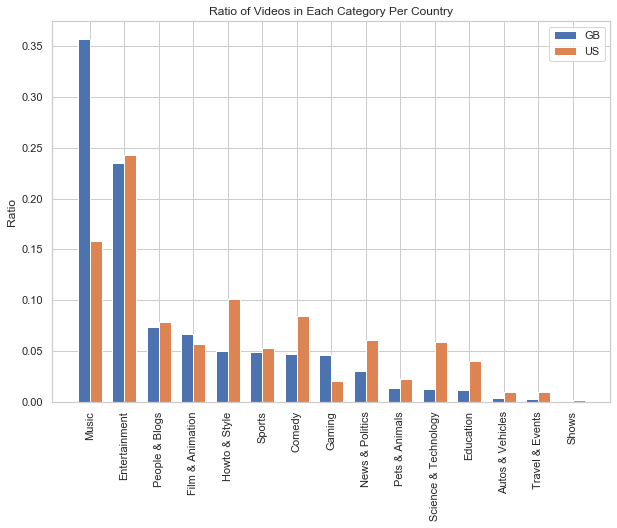

In [514]:
nd = np.arange(len(cat))  #
width = 0.35  
fig, ax = plt.subplots(figsize=(10,7))
us = ax.bar(ind - width/2, np.array(cat.gb_ratio), width,
                label='GB')
gb = ax.bar(ind + width/2, np.array(cat.us_ratio), width, 
                label='US')


ax.set_ylabel('Ratio')
ax.set_title('Ratio of Videos in Each Category Per Country')
ax.set_xticks(ind)
ax.set_xticklabels(list(cat.category))
plt.xticks(rotation=90)
ax.legend()


As we can see in the graph above, a majority of the trending videos in Great Britain were music videos, while most of the trending videos in the US fell in the entertainment category. 

We see that most of the trending youtube videos in Great Britain are music videos while videos that fall in the entertainment category are most popular in the US.

### Which categories have the lowest like/dislike ratio?

Text(0.5, 1.0, 'Likes-Dislikes Ratio by Category')

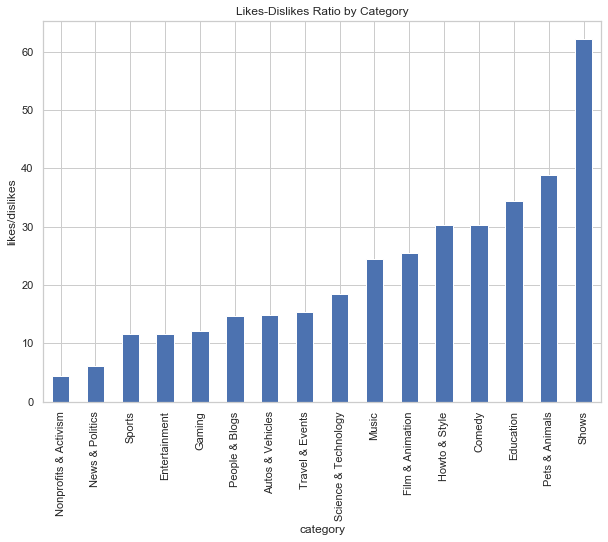

In [515]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
((df.groupby('category')['likes'].sum())/(df.groupby('category')['dislikes'].sum())).sort_values().plot(kind='bar')
plt.ylabel('likes/dislikes')
plt.title('Likes-Dislikes Ratio by Category')

### Which categories usually have more comments?

Text(0, 0.5, 'comment count (by 10,000)')

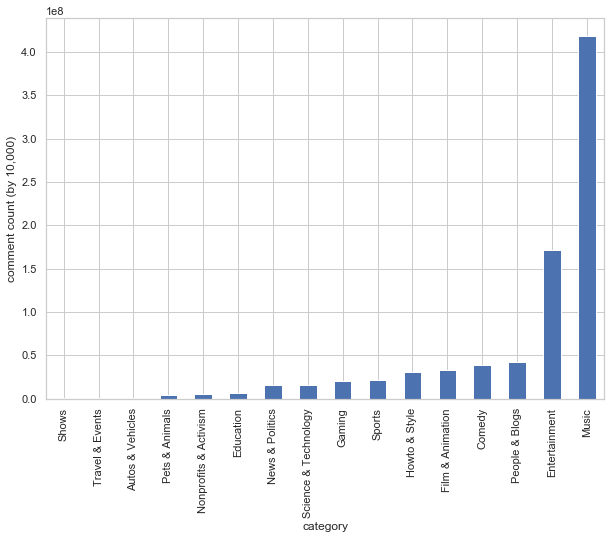

In [516]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
df.groupby('category')['comment_count'].sum().sort_values().plot(kind='bar')
plt.ylabel('comment count (by 10,000)')

### Which categories usually have their comments disabled? (and do trending videos usually disable comments?)


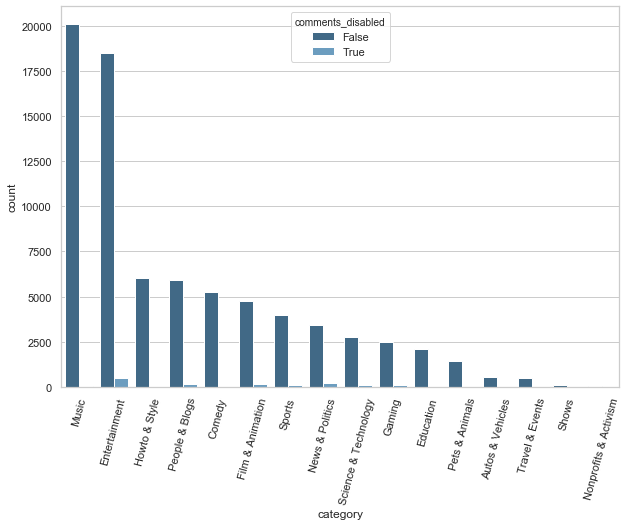

In [517]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=75)
ax=sns.countplot(x="category", data=df,palette=("Blues_d"),hue='comments_disabled',order=df['category'].value_counts().index)


## Which categories had the most views?

Next, we check which categories had the most views. Since the videos can be on the trending list more than once, we first figure out the latest number of views each video had the last time it was on the trending list. 

In [840]:
view_count={}
last_date={}
category={}
tags={}
sample=df.reset_index()
for x in set(sample.video_id):
    df2= sample[sample['video_id']==x]
    latest=np.int(df2.views[-1:])
    view_count[x]=latest
    date=list(df2.trending_date)[-1]
    last_date[x]=date
    category[x]=list(df2.category)[0]
    tags[x]=list(df2.tag_count)[0]
 

In [842]:
view_count=pd.DataFrame.from_dict(view_count,orient='index')
last_date=pd.DataFrame.from_dict(last_date,orient='index')
category=pd.DataFrame.from_dict(category,orient='index')
tags=pd.DataFrame.from_dict(tags,orient='index')

In [843]:
views=(view_count.merge(last_date,how='left',left_index=True,right_index=True))\
            .merge(category,how='left',left_index=True,right_index=True)\
            .merge(tags,how='left',left_index=True,right_index=True)
views.columns=['views','trending_date','category','tag_count']

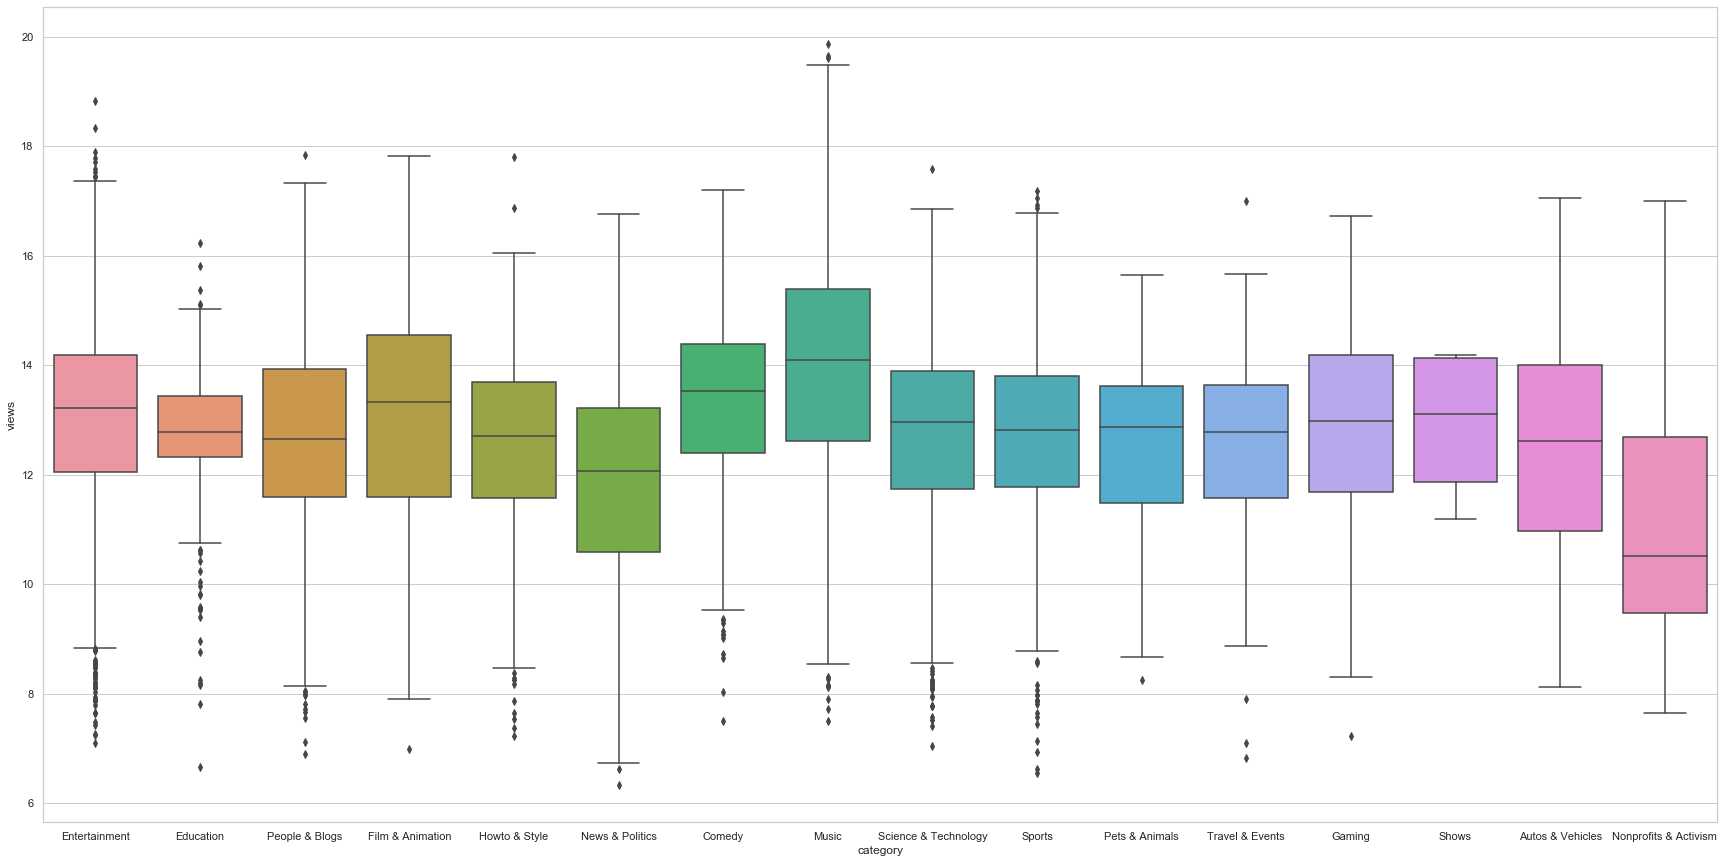

In [523]:
f, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="category", y=np.log(views.views), data=views)


## Do videos with more tag counts have more views?

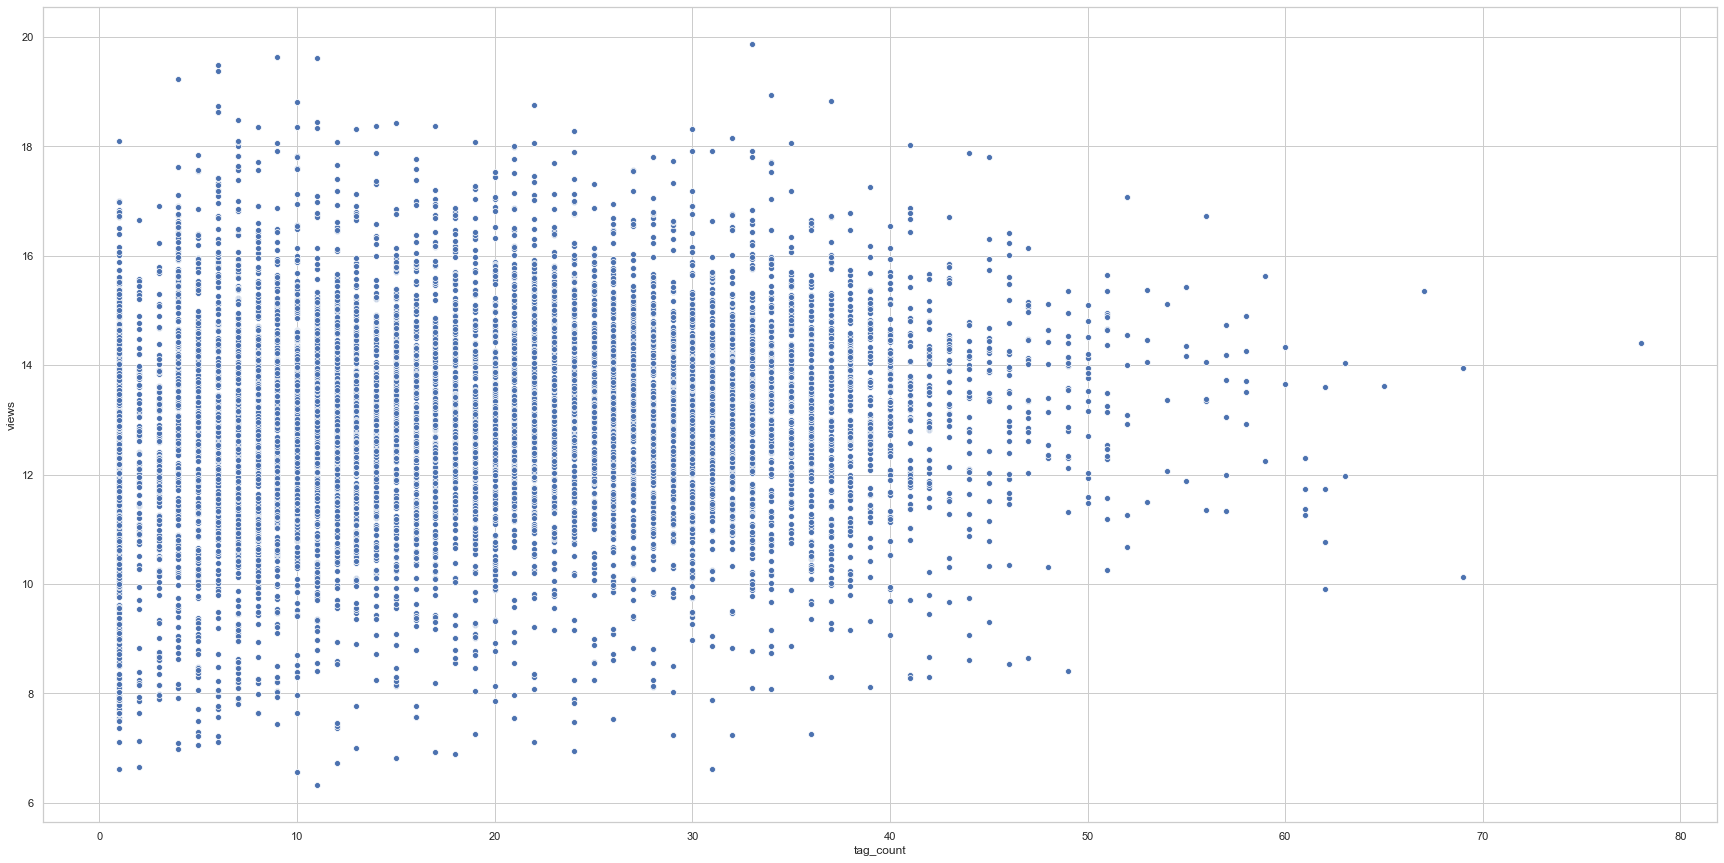

In [845]:
f, ax = plt.subplots(figsize=(30,15))
sns.scatterplot(x='tag_count',y=np.log(views.views),data=views)

Looking at the scatter plot, there doesn't seem to be any relationship between the two.

## Which videos showed up on the trending list most often?

In [740]:
# in Great Britain:

vid_gb=df_gb[['video_id','title','category']].drop_duplicates()

top_gb=pd.DataFrame(df_gb.video_id.value_counts())
top_gb=top_gb.reset_index()
top_gb.columns=['video_id','count']
top_gb=top_gb.merge(vid_gb,how='left',on='video_id').drop_duplicates()
top_gb[:6]

,video_id,count,title,category
0,NooW_RbfdWI,38,Jurassic World: Fallen Kingdom - Official Trai...,Entertainment
1,Il-an3K9pjg,38,Anne-Marie - 2002 [Official Video],Music
2,2z3EUY1aXdY,38,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,Sports
3,BhIEIO0vaBE,38,To Our Daughter,People & Blogs
4,u_C4onVrr8U,38,"Miguel - Come Through and Chill ft. J. Cole, S...",Music
5,u_C4onVrr8U,38,Miguel - Come Through and Chill (Official Vide...,Music


In Great Britain, six videos tied for trending for the most number of days. These videos were on the trending list for 38 days, with half of them belonging in the music category.

In [770]:
# in the US:

vid_us=df_us[['video_id','title','category']].drop_duplicates()

top_us=pd.DataFrame(df_us.video_id.value_counts())
top_us=top_us.reset_index()
top_us.columns=['video_id','count']
top_us=top_us.merge(vid_us,how='left',on='video_id').drop_duplicates()
top_us[:1]

,video_id,count,title,category
0,j4KvrAUjn6c,30,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment


In the US, the most number of days a video has been included in the top trending list in our data is 30. This video falls in the entertainment category.

## Inferential Statistics

After studying trends across categories, we apply inferential statistics techniques to see if features such as the number of views, comments, likes, dislikes, and etc. are significantly different from each other. By doing so, we'll get a better idea whether or not they are an important feature in determining a category.

### Views By Category

Null Hypothesis: The number of views each category gets are not statistically different from each other.

Alternative Hypothesis: The number of views each category gets are statistically different from each other.

In [783]:
categories=list(set(df.category))

In [846]:
f_results=stats.f_oneway(np.array(views['views'][views['category']==categories[0]]),np.array(views['views'][views['category']==categories[1]]),\
                         np.array(views['views'][views['category']==categories[2]]),np.array(views['views'][views['category']==categories[3]]),\
                         np.array(views['views'][views['category']==categories[4]]),np.array(views['views'][views['category']==categories[5]]),\
                         np.array(views['views'][views['category']==categories[6]]),np.array(views['views'][views['category']==categories[7]]),\
                         np.array(views['views'][views['category']==categories[8]]),np.array(views['views'][views['category']==categories[9]]),\
                         np.array(views['views'][views['category']==categories[10]]),np.array(views['views'][views['category']==categories[11]]),\
                         np.array(views['views'][views['category']==categories[12]]),np.array(views['views'][views['category']==categories[13]]),\
                         np.array(views['views'][views['category']==categories[14]]),np.array(views['views'][views['category']==categories[15]]))

In [847]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of views each category gets are not statistically different from each other.')
else:
    print('The number of views each category gets are statistically different from each other.')


f-stat: 29.91229
p-value:0.0000000000
The number of views each category gets are statistically different from each other.


### Likes By Category

Null Hypothesis: The number of likes each category gets are not statistically different from each other.

Alternative Hypothesis: The number of likes each category gets are statistically different from each other.

In [785]:
f_results=stats.f_oneway(np.array(df['likes'][df['category']==categories[0]]),np.array(df['likes'][df['category']==categories[1]]),\
                         np.array(df['likes'][df['category']==categories[2]]),np.array(df['likes'][df['category']==categories[3]]),\
                         np.array(df['likes'][df['category']==categories[4]]),np.array(df['likes'][df['category']==categories[5]]),\
                         np.array(df['likes'][df['category']==categories[6]]),np.array(df['likes'][df['category']==categories[7]]),\
                         np.array(df['likes'][df['category']==categories[8]]),np.array(df['likes'][df['category']==categories[9]]),\
                         np.array(df['likes'][df['category']==categories[10]]),np.array(df['likes'][df['category']==categories[11]]),\
                         np.array(df['likes'][df['category']==categories[12]]),np.array(df['likes'][df['category']==categories[13]]),\
                         np.array(df['likes'][df['category']==categories[14]]),np.array(df['likes'][df['category']==categories[15]]))

In [787]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of likes each category gets are not statistically different from each other.')
else:
    print('The number of likes each category gets are statistically different from each other.')

f-stat: 544.81234
p-value:0.0000000000
The number of likes each category gets are statistically different from each other.


### Dislikes By Category

Null Hypothesis: The number of dislikes each category gets are not statistically different from each other.

Alternative Hypothesis: The number of dislikes each category gets are statistically different from each other.

In [789]:
f_results=stats.f_oneway(np.array(df['dislikes'][df['category']==categories[0]]),np.array(df['dislikes'][df['category']==categories[1]]),\
                         np.array(df['dislikes'][df['category']==categories[2]]),np.array(df['dislikes'][df['category']==categories[3]]),\
                         np.array(df['dislikes'][df['category']==categories[4]]),np.array(df['dislikes'][df['category']==categories[5]]),\
                         np.array(df['dislikes'][df['category']==categories[6]]),np.array(df['dislikes'][df['category']==categories[7]]),\
                         np.array(df['dislikes'][df['category']==categories[8]]),np.array(df['dislikes'][df['category']==categories[9]]),\
                         np.array(df['dislikes'][df['category']==categories[10]]),np.array(df['dislikes'][df['category']==categories[11]]),\
                         np.array(df['dislikes'][df['category']==categories[12]]),np.array(df['dislikes'][df['category']==categories[13]]),\
                         np.array(df['dislikes'][df['category']==categories[14]]),np.array(df['dislikes'][df['category']==categories[15]]))

In [790]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of dislikes each category gets are not statistically different from each other.')
else:
    print('The number of dislikes each category gets are statistically different from each other.')

f-stat: 60.05653
p-value:0.0000000000
The number of dislikes each category gets are statistically different from each other.


### Comment Count By Category

Null Hypothesis: The number of comments each category gets are not statistically different from each other.

Alternative Hypothesis: The number of comments each category gets are statistically different from each other.

In [823]:
f_results=stats.f_oneway(np.array(df['comment_count'][df['category']==categories[0]]),np.array(df['comment_count'][df['category']==categories[1]]),\
                         np.array(df['comment_count'][df['category']==categories[2]]),np.array(df['comment_count'][df['category']==categories[3]]),\
                         np.array(df['comment_count'][df['category']==categories[4]]),np.array(df['comment_count'][df['category']==categories[5]]),\
                         np.array(df['comment_count'][df['category']==categories[6]]),np.array(df['comment_count'][df['category']==categories[7]]),\
                         np.array(df['comment_count'][df['category']==categories[8]]),np.array(df['comment_count'][df['category']==categories[9]]),\
                         np.array(df['comment_count'][df['category']==categories[10]]),np.array(df['comment_count'][df['category']==categories[11]]),\
                         np.array(df['comment_count'][df['category']==categories[12]]),np.array(df['comment_count'][df['category']==categories[13]]),\
                         np.array(df['comment_count'][df['category']==categories[14]]),np.array(df['comment_count'][df['category']==categories[15]]))

In [824]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of comments each category gets are not statistically different from each other.')
else:
    print('The number of comments each category gets are statistically different from each other.')

f-stat: 148.42400
p-value:0.0000000000
The number of comments each category gets are statistically different from each other.


### Tag Count By Category

Null Hypothesis: The number of tags the videos in each category are not statistically different from each other.

Alternative Hypothesis: The number of tags the videos in each category are statistically different from each other.

In [848]:
f_results=stats.f_oneway(np.array(views['tag_count'][views['category']==categories[0]]),np.array(views['tag_count'][views['category']==categories[1]]),\
                         np.array(views['tag_count'][views['category']==categories[2]]),np.array(views['tag_count'][views['category']==categories[3]]),\
                         np.array(views['tag_count'][views['category']==categories[4]]),np.array(views['tag_count'][views['category']==categories[5]]),\
                         np.array(views['tag_count'][views['category']==categories[6]]),np.array(views['tag_count'][views['category']==categories[7]]),\
                         np.array(views['tag_count'][views['category']==categories[8]]),np.array(views['tag_count'][views['category']==categories[9]]),\
                         np.array(views['tag_count'][views['category']==categories[10]]),np.array(views['tag_count'][views['category']==categories[11]]),\
                         np.array(views['tag_count'][views['category']==categories[12]]),np.array(views['tag_count'][views['category']==categories[13]]),\
                         np.array(views['tag_count'][views['category']==categories[14]]),np.array(views['tag_count'][views['category']==categories[15]]))

In [850]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of tags the videos in each category has are not statistically different from each other.')
else:
    print('The number of tags the videos in each category has are statistically different from each other.')

f-stat: 51.10537
p-value:0.0000000000
The number of tags the videos in each category has are statistically different from each other.


In conclusion, we see that all of the differences in the videos' statistics across categories that we looked into are statistically significant. We will take this into consideration when we start building our models.